<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">1. Camera calibration</p>

In this part we will first work with the image sequence of the ``left`` directory that belong to the calibration of the left camera of an stereo camera. 


This sequence contains a series of images of the calibration template. For the calibration it should be taken into account that the size of each template slot is 30 mm in the $X$ and $Y$ axis.

In [1]:
import cv2 
import glob
import copy
import numpy as np 
import imageio 
import matplotlib.pyplot as plt

from pprint import pprint as pp


In [3]:
def load_images(filenames: list):
    '''Function to load images from a list of filenames
    '''
    return [imageio.imread(filename) for filename in filenames]

In [4]:
# We use glob to obtain all the filenames
filenames = glob.glob('Calib_Images/*.jpg')
imgs = load_images(filenames)

C:\Users\peper\AppData\Local\Temp\ipykernel_20716\2082896409.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


The function ``cv2.findChessboardCorners`` of
OpenCV function finds the calibration template in an image and
returns a tuple of two elements. The first element
is 0 if it failed to successfully detect the template, and
is 1 otherwise. The second element contains the
coordinates of the corners of the calibration template,
which are only valid if the detection was successful, 
i.e. if the first element of the tuple is 1.

<hr>

**Use the function** ``cv2.findChessboardCorners``**, and optionally** ``cv2.cornerSubPix``**, to automatically detect the calibration pattern and its corners in all loaded images**. The size of the calibration stencil in the practice images is (8, 6), that is, 8 rows and 6 columns. It stores the results of the multiple calls in a list, so that the element $i$ in that list corresponds to the result of ``cv2.findChessboardCorners`` for the image $i$ loaded earlier.

In [10]:
# Using findChessboardCorners, we obtain the corners of each image
corners = []
for i in range(len(imgs)):
    corners.append(cv2.findChessboardCorners(imgs[i], (20,4),None))

In [11]:
# cornerSubPix is a destructive function, so we copy the corners
corners2 = copy.deepcopy(corners)

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

# As this function needs the images in grayscale, we convert them
imgs_grey = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in imgs]
# For each image and corners we are going to use cornerSubPix
cornersRefined = [cv2.cornerSubPix(i, cor[1], (8, 6), (-1, -1), criteria) if cor[0] else [] for i, cor in zip(imgs_grey, corners2)]



The next exercise consists of drawing on the images the points detected by ``cv.FindChessboardCorners``. For efficiency reasons, the function used to do this modifies directly the images passed by parameter instead of making a copy. To avoid losing the original images it is better to make a copy of them in advance. One way to do this is ``imgs2 = copy.deepcopy(imgs)``
where ``imgs`` is the list of loaded images. Use these copied images instead of the original ones in the
in the following exercise.

<hr>

**Use.**  ``cv2.drawChessboardCorners`` **to draw the corners detected in the previous exercise**. Apply it to all images that were correctly detected. Ignore the rest.

Display some results

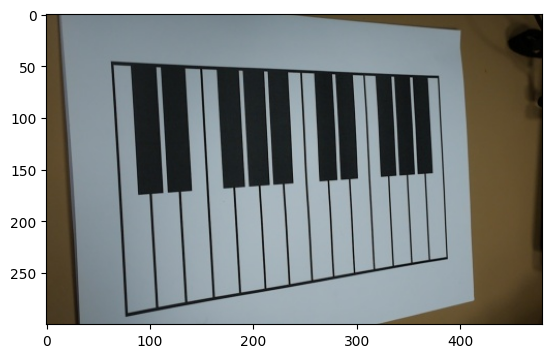

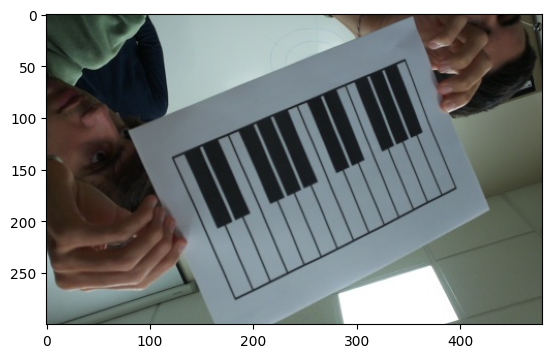

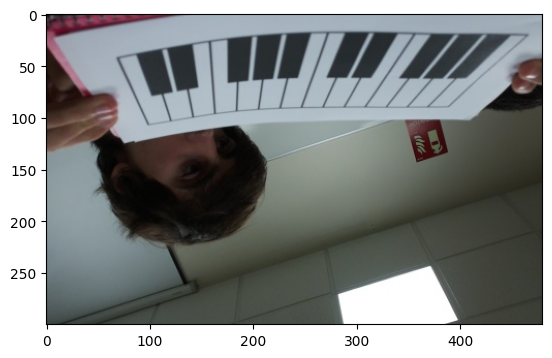

None


In [12]:
imgs2 = copy.deepcopy(imgs)

# We draw the corners on the images
for i in range(1,4):
    cv2.drawChessboardCorners(imgs2[i],(8,6),corners[i][1],True)
    plt.figure()
    plt.imshow(imgs2[i])
    plt.show()

print(corners[1][1])

To calibrate the camera, in addition to the coordinates of the corners in each of the images, the three-dimensional corner coordinates of the corners in the reference system of the scene.
 For this practice we will consider that the center of the reference system, i.e. the
point of coordinates $[0, 0, 0]^\top$, is the first corner of the calibration template detected in the scene's reference frame.
We will also consider that the X-axis corresponds to the short side of the calibration template, i.e., the coordinate point, and the Y-axis to the long side.
This arrangement implies that the Z-axis points in the upward normal direction of the calibration plane.


For the following exercise it is very important to take into account that the coordinates of the corners in the system of
scene reference should be given in the same order as
in which they were detected in each of the images.

<hr>

**Implement the function** ``get_chessboard_points (chessboard_shape, dx, dy)`` that will generate an array of `NumPy` (that is, an ndarray) of
size $ N × 3 $ with the coordinates $ (x, y, z) $ of the corners of
the calibration template in the reference system of the
scene. $ N $ is the number of corners in the template.

``chessboard_shape`` is the number of points per row
and by columns of the calibration template. Like
in Exercise 1, it should be (8, 6). `` dx`` (resp. `` dy``) is the width
(resp. high) of a square of the calibration template.
For the template used in this lab, both values
they are $30mm$.

In [7]:
def get_chessboard_points(chessboard_shape, dx, dy):
    '''
    Obtain the coordinates of the chessboard points
    '''
    points = np.ndarray((chessboard_shape[0]*chessboard_shape[1], 3), dtype=np.float32)

    count = 0
    for i in range(chessboard_shape[1]):
        for j in range(chessboard_shape[0]):
            points[count] = [i*dx, j*dy, 0]
            count += 1
    return points

cb_points = get_chessboard_points((8, 6), 30, 30)
print(cb_points)


[[  0.   0.   0.]
 [  0.  30.   0.]
 [  0.  60.   0.]
 [  0.  90.   0.]
 [  0. 120.   0.]
 [  0. 150.   0.]
 [  0. 180.   0.]
 [  0. 210.   0.]
 [ 30.   0.   0.]
 [ 30.  30.   0.]
 [ 30.  60.   0.]
 [ 30.  90.   0.]
 [ 30. 120.   0.]
 [ 30. 150.   0.]
 [ 30. 180.   0.]
 [ 30. 210.   0.]
 [ 60.   0.   0.]
 [ 60.  30.   0.]
 [ 60.  60.   0.]
 [ 60.  90.   0.]
 [ 60. 120.   0.]
 [ 60. 150.   0.]
 [ 60. 180.   0.]
 [ 60. 210.   0.]
 [ 90.   0.   0.]
 [ 90.  30.   0.]
 [ 90.  60.   0.]
 [ 90.  90.   0.]
 [ 90. 120.   0.]
 [ 90. 150.   0.]
 [ 90. 180.   0.]
 [ 90. 210.   0.]
 [120.   0.   0.]
 [120.  30.   0.]
 [120.  60.   0.]
 [120.  90.   0.]
 [120. 120.   0.]
 [120. 150.   0.]
 [120. 180.   0.]
 [120. 210.   0.]
 [150.   0.   0.]
 [150.  30.   0.]
 [150.  60.   0.]
 [150.  90.   0.]
 [150. 120.   0.]
 [150. 150.   0.]
 [150. 180.   0.]
 [150. 210.   0.]]


<hr>

**ASIGNMENT** Calibrate the left camera using the results list of `` cv2.findChessboardCorners``
and the set of model points given by `` get_chessboard_points``, from the previous exercise.

Save the result of the calibration, intrinsic matrix and extrinsic matrices, with the command
np.savez (‘calib_left’, intrinsic = intrinsic, extrinsic = extrinsic)

In [8]:
# We are going to retrieve existing corners (cor[0] == True)
valid_corners = [cor[1] for cor in corners if cor[0]]


num_valid_images = len(valid_corners)

# Matrix with the coordinates of the corners
real_points = get_chessboard_points((8, 6), 30, 30)

# We are going to convert our coordinates list in the reference system to numpy array
object_points = np.asarray([real_points for i in range(num_valid_images)], dtype=np.float32)

# Convert the corners list to array
image_points = np.asarray(valid_corners, dtype=np.float32)

# Calibrate
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(object_points, image_points, imgs[1].shape[0:2], None, None)
# Calculate extrinsecs matrix using Rodigues on each rotation vector addid its translation vector
extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))
# Save the calibration file
np.savez('calib_left', intrinsic=intrinsics, extrinsic=extrinsics)

# Lets print some outputs
print("Corners standard intrinsics:\n",intrinsics)
print("Corners standard dist_coefs:\n", dist_coeffs)
print("root mean sqaure reprojection error:\n", rms)

Corners standard intrinsics:
 [[419.17367987   0.         149.87203892]
 [  0.         420.67532307 128.88566112]
 [  0.           0.           1.        ]]
Corners standard dist_coefs:
 [[ 2.54768655e-02 -3.34669243e+00  4.93017410e-03 -6.84826723e-03
   2.00281256e+01]]
root mean sqaure reprojection error:
 0.1530731137156253


<hr>

**ASIGNMENT** Repeat the procedure to calibrate the right camera too. In the end, print the calculated extrinsics and intrinsics parameters for both cameras.

Once finished, **please print the root mean square reprojection error and justify in the report its meaning.**

C:\Users\javie\AppData\Local\Temp\ipykernel_4388\2082896409.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


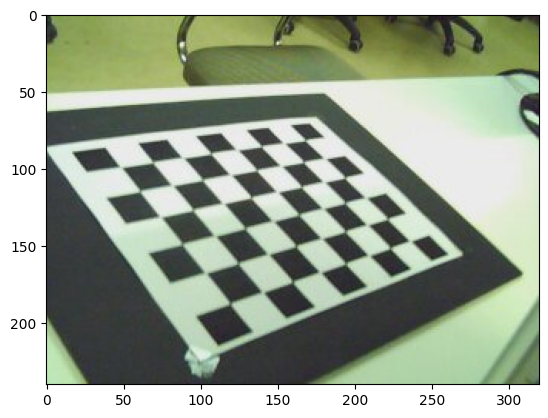

In [9]:
#FILL THIS UP
filenames = glob.glob('right/*.jpg')
imgsr = load_images(filenames)
plt.imshow(imgsr[1])
plt.show()

cornersr = []
for i in range(len(imgs)):
    cornersr.append(cv2.findChessboardCorners(imgsr[i], (8,6),None))


In [15]:
# We are going to retrieve existing corners (cor[0] == True)
valid_corners_r = [cor[1] for cor in cornersr if cor[0]]

num_valid_images_r = len(valid_corners_r)

# Matrix with the coordinates of the corners
real_points_r = get_chessboard_points((8, 6), 30, 30)

# We are going to convert our coordinates list in the reference system to numpy array
object_points_r = np.asarray([real_points_r for i in range(num_valid_images_r)], dtype=np.float32)

# Convert the corners list to array
image_points_r = np.asarray(valid_corners_r, dtype=np.float32)

# Calibrate
rms_r, intrinsics_r, dist_coeffs_r, rvecs_r, tvecs_r = cv2.calibrateCamera(object_points_r, image_points_r, imgsr[1].shape[0:2], None, None)
# Calculate extrinsecs matrix using Rodigues on each rotation vector addid its translation vector
extrinsics_r = list(map(lambda rvec_r, tvec_r: np.hstack((cv2.Rodrigues(rvec_r)[0], tvec_r)), rvecs_r, tvecs_r))
# Save the calibration file
np.savez('calib_left', intrinsic=intrinsics_r, extrinsic=extrinsics_r)

# Lets print some outputs
print("Corners standard intrinsics:\n",intrinsics_r)
print("Corners standard dist_coefs:\n", dist_coeffs_r)
print("root mean square reprojection error (Right camera):\n", rms_r)

Corners standard intrinsics:
 [[432.19183597   0.         146.77820875]
 [  0.         435.44775765 137.27781928]
 [  0.           0.           1.        ]]
Corners standard dist_coefs:
 [[-0.11862369 -0.18601104  0.00625041 -0.00822418  1.0894548 ]]
root mean square reprojection error (Right camera):
 0.2058885062087139


In [16]:
# HINT: Calculate the extrinsecs with Rodrigues given the translation and rotation matrixes
extrinsics_r = list(map(lambda rvec_r, tvec_r: np.hstack((cv2.Rodrigues(rvec_r)[0], tvec_r)), rvecs_r, tvecs_r))
print("Extrinsc:\n",extrinsics_r)

Extrinsc:
 [array([[ 6.15869447e-01,  7.14799609e-01,  3.31310040e-01,
        -9.16869970e+01],
       [ 6.17227084e-01, -1.76410814e-01, -7.66752862e-01,
        -3.61877222e+01],
       [-4.89627972e-01,  6.76713192e-01, -5.49839709e-01,
         5.26702885e+02]]), array([[ 6.01315971e-01,  7.17391159e-01,  3.51808226e-01,
        -1.18122805e+02],
       [ 6.51406643e-01, -1.85179906e-01, -7.35783792e-01,
        -4.59031855e+01],
       [-4.62696973e-01,  6.71608761e-01, -5.78665001e-01,
         5.18404866e+02]]), array([[ 5.83057695e-01,  7.27745848e-01,  3.61150531e-01,
        -1.29550384e+02],
       [ 6.82126084e-01, -1.97050107e-01, -7.04184110e-01,
        -6.09316284e+01],
       [-4.41302311e-01,  6.56930161e-01, -6.11306006e-01,
         5.08022852e+02]]), array([[ 5.57069661e-01,  7.49807133e-01,  3.57019126e-01,
        -1.22616164e+02],
       [ 7.06087472e-01, -2.01330869e-01, -6.78900849e-01,
        -7.16384334e+01],
       [-4.37165728e-01,  6.30281798e-01, -6.41

<hr>

**OPTIONAL EXERCISE.** What is the distance, in millimeters, between the two cameras?

Hint: Use the extrinsics of the first pair of images so that all points of the template are simultaneously visible.

to convert rvecs to a matrix "rotM" use the openCV function "cv2.Rodrigues(rvecs[0])[0]" , e.g.

In [12]:
# Obtain the Rotation Matrix
rotM_r = cv2.Rodrigues(rvecs_r[1])[0]

# We obtain the complete extrinsics matrix (R|T) of the right camera
cameraPosition_r = np.matrix(rotM_r).T * np.matrix(tvecs_r[1])
pp(cameraPosition_r)

# Same now for the left camera
rotM = cv2.Rodrigues(rvecs[1])[0]
# We obtain the complete extrinsics matrix (R|T) of the left camera
cameraPosition = np.matrix(rotM).T * np.matrix(tvecs[1])
pp(cameraPosition)

# We calculate the distance between the two cameras
dist = np.linalg.norm(cameraPosition_r - cameraPosition)
pp('The distance in millimeters is: {}'.format(dist))

matrix([[-340.79513149],
        [ 271.92534049],
        [-307.76450699]])
matrix([[-301.22043044],
        [ 291.29402949],
        [-291.12880099]])
'The distance in millimeters is: 47.096175971289405'


The information to calculate the distance between cameras has been obtained using the link data:

https://stackoverflow.com/questions/14444433/calculate-camera-world-position-with-opencv-python


<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. Distortion correction</p>

In this part we will work on undistorting an image taken with a fisheye lens. First we will calibrate a fisheye camera and then we will use this calibration parameters to undistort one of the calibration images.

For this exercies, the calibration images are under "fisheye pattern" folder

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

CHECKERBOARD = (6,7)
subpix_criteria = (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 0.1)
# calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_CHECK_COND+cv2.fisheye.CALIB_FIX_SKEW
calibration_flags = cv2.fisheye.CALIB_RECOMPUTE_EXTRINSIC+cv2.fisheye.CALIB_FIX_SKEW
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Find all the images in the folder
images = glob.glob('fisheye pattern/*.jpg')
# We apply the same method as previously to obtain the corners for each image
for fname in images:
    image = cv2.imread(fname)
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    corners = cv2.findChessboardCorners(gray, CHECKERBOARD,cv2.CALIB_CB_ADAPTIVE_THRESH+cv2.CALIB_CB_FAST_CHECK +cv2.CALIB_CB_NORMALIZE_IMAGE)
    objpoints.append(objp)
    cv2.cornerSubPix(gray,corners[1],(3,3),(-1,-1),subpix_criteria)
    imgpoints.append(corners[1])
            
_img_shape = image[:,:,0].shape[::-1]
N_OK = len(objpoints)
K = np.zeros((3, 3))
D = np.zeros((4, 1))
rvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
tvecs = [np.zeros((1, 1, 3), dtype=np.float64) for i in range(N_OK)]
print(objpoints)
rms, _, _, _, _ = \
cv2.fisheye.calibrate(objpoints,imgpoints, gray.shape[::-1], K, D, rvecs, tvecs, calibration_flags, (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 30, 1e-6))
print("Found " + str(N_OK) + " valid images for calibration")
print("DIM=" + str(_img_shape[::-1]))
print("K=np.array(" + str(K.tolist()) + ")")
print("D=np.array(" + str(D.tolist()) + ")")

[array([[[0., 0., 0.],
        [1., 0., 0.],
        [2., 0., 0.],
        [3., 0., 0.],
        [4., 0., 0.],
        [5., 0., 0.],
        [0., 1., 0.],
        [1., 1., 0.],
        [2., 1., 0.],
        [3., 1., 0.],
        [4., 1., 0.],
        [5., 1., 0.],
        [0., 2., 0.],
        [1., 2., 0.],
        [2., 2., 0.],
        [3., 2., 0.],
        [4., 2., 0.],
        [5., 2., 0.],
        [0., 3., 0.],
        [1., 3., 0.],
        [2., 3., 0.],
        [3., 3., 0.],
        [4., 3., 0.],
        [5., 3., 0.],
        [0., 4., 0.],
        [1., 4., 0.],
        [2., 4., 0.],
        [3., 4., 0.],
        [4., 4., 0.],
        [5., 4., 0.],
        [0., 5., 0.],
        [1., 5., 0.],
        [2., 5., 0.],
        [3., 5., 0.],
        [4., 5., 0.],
        [5., 5., 0.],
        [0., 6., 0.],
        [1., 6., 0.],
        [2., 6., 0.],
        [3., 6., 0.],
        [4., 6., 0.],
        [5., 6., 0.]]], dtype=float32), array([[[0., 0., 0.],
        [1., 0., 0.],
        [2., 

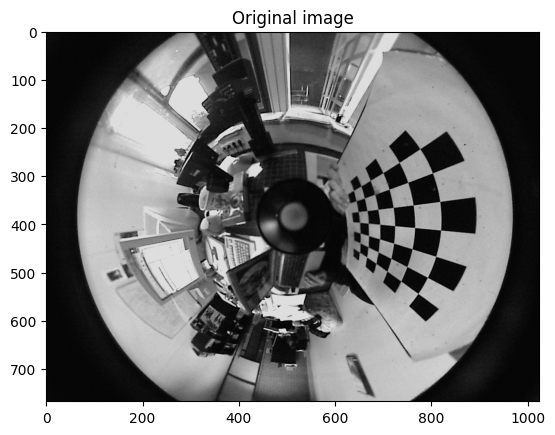

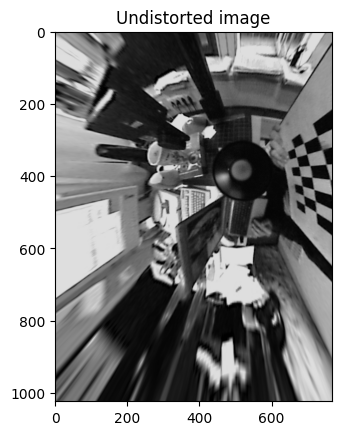

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
DIM = (_img_shape[1], _img_shape[0])
# We choose a random image filename
fname = images[random.randint(0,len(images)-1)]
img = cv2.imread(fname)
h,w = img.shape[:2]    
# We obtain the new camera matrix from the calibration
map1, map2 = cv2.fisheye.initUndistortRectifyMap(K, D, np.eye(3), K, DIM, cv2.CV_16SC2)

# We obtain the undistorted image
undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

# We show the original image and the undistorted one
plt.figure()
plt.imshow(img)
# Title of the image
plt.title('Original image')
plt.figure()
plt.imshow(undistorted_img)
# Title of the image
plt.title('Undistorted image')
plt.show()
